# NST Preprocessing Experiment (NPE):
## Top2Vec model from lemmatized dataset

Generating a Topic-to-vector (Top2Vec) model from the lemmatized dataset.

In [1]:
# Imports
import random
import os
import multiprocessing as mp
from top2vec import Top2Vec

from src.utils.file_management import (
    ROOT_PATH,
    load_subtitles,
    write_topics_file)

from src.utils.tables_and_plots import (
    display_n_wordclouds,
    create_wordcloud
)

NST_SAMPLE_SIZE = 1000
EMBEDDING_MODEL = "distiluse"
PIPELINE = "lemmatized"

In [2]:
# Load preprocessed CSV file
folder_path_data = r"nst_preprocessing_experiment/preprocessed_data"
file_name_data = f"npe_{NST_SAMPLE_SIZE}_{PIPELINE}"

subtitled_programs = load_subtitles(folder_path_data, file_name_data)

In [3]:
example_program_id = random.choice(list(subtitled_programs.keys()))
example_program_slice = 5
subtitled_programs[example_program_id][:example_program_slice]

['tog', 'migrant', 'vei', 'mellomamerika', 'usa']

In [4]:
# Concatenating tokens to long strings/documents
for (program_id, subtitles) in subtitled_programs.items():
    subtitled_programs[program_id] = " ".join(subtitles)

In [5]:
# Creating/loading model from dataset

folder_path_model = r"nst_preprocessing_experiment/models/top2vec"
file_name_model = f"npe_{NST_SAMPLE_SIZE}_{PIPELINE}_top2vec_{EMBEDDING_MODEL}"
file_path = os.path.join(ROOT_PATH, folder_path_model, PIPELINE, file_name_model)

top2vec = None

if os.path.exists(file_path):
    top2vec = Top2Vec.load(file_path)
else:
    if EMBEDDING_MODEL == "distiluse":
        embedding = "distiluse-base-multilingual-cased"
    top2vec = Top2Vec(documents=list(subtitled_programs.values()), embedding_model=embedding, min_count=5, speed="fast-learn", workers=mp.cpu_count() - 2)
    top2vec.save(file_path)

In [6]:
num_topics = top2vec.get_num_topics()
num_topics

2

In [7]:
topic_sizes, _ = top2vec.get_topic_sizes()
topic_sizes

array([927,  72], dtype=int64)

In [8]:
topic_words, word_scores, topic_nums = top2vec.get_topics(num_topics)

In [9]:
topic_word_scores = [dict(zip(topic_words[i][:10], word_scores[i])) for i in topic_nums]

In [10]:
for i in range(2):
    print("\n", i)
    print(topic_word_scores[i])
    


 0
{'oooooh': 0.1863893, 'hahaha': 0.16719173, 'uff': 0.16426334, 'haha': 0.1635788, 'nff': 0.16227502, 'ooo': 0.16193157, 'fuck': 0.16125861, 'takke': 0.15782748, 'oh': 0.15765317, 'ooh': 0.1528149}

 1
{'russernes': 0.29627904, 'russisk': 0.2910102, 'russlands': 0.2563746, 'rusavhengig': 0.25404137, 'russland': 0.24673252, 'sovjetisk': 0.2400536, 'russetid': 0.23780318, 'russ': 0.22662082, 'ukrainas': 0.22644314, 'ukraina': 0.21769659}


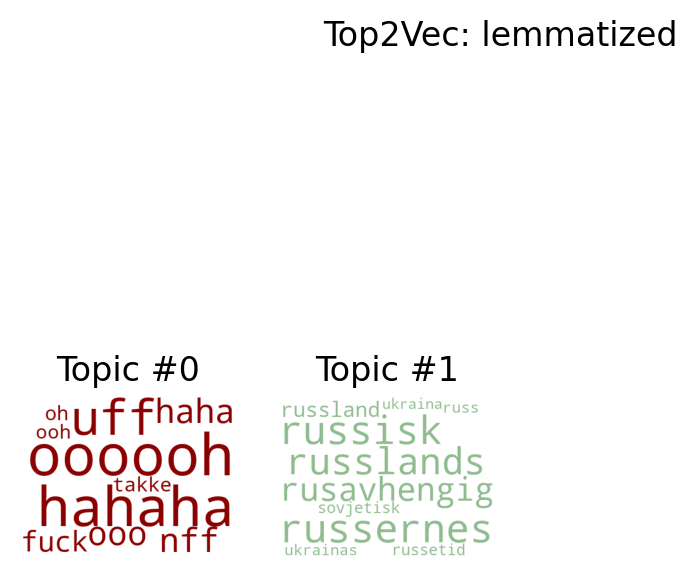

In [11]:
display_n_wordclouds(topic_word_scores, "Top2Vec: " + PIPELINE, num_topics, dpi=200)

In [12]:
folder_path_word_cloud = f"nst_preprocessing_experiment/results/word_clouds/top2vec/{PIPELINE}"

for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [13]:
# Save topic words of model to file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

folder_path_topics = r"nst_preprocessing_experiment/results/topics/"
file_name_topics = file_name_data

write_topics_file(folder_path_topics, file_name_topics, topic_words_numbered, model="top2vec", top2vec_embedding=EMBEDDING_MODEL)